In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from keras.models import load_model

In [58]:
data = pd.read_csv('content/drive/MyDrive/Project/merged_data.csv')

In [59]:
data.head()

,Unnamed: 0,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor,euclidean_distance_neighbor_group
0,0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.143920,6.938212,5.905144,0.0,100.0
1,1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376,5.238002,0.0,100.0
2,2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.808820,18.203441,5.590079,4.550138,0.0,100.0
3,3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794,3.859412,0.0,100.0
4,4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.102720,19.272981,4.312196,3.257953,0.0,100.0


In [60]:
data.drop(data.columns[0], axis=1, inplace = True)

In [61]:
data.head()

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,Constant_speed,Speed_as_magnitude,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination,euclidean_distance_with_obstacles,euclidean_distance_neighbor,euclidean_distance_neighbor_group
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,12,9,28.547123,15.453889,17.143920,6.938212,5.905144,0.0,100.0
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,14,9,29.208351,16.121264,17.699584,6.278376,5.238002,0.0,100.0
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,15,10,29.854694,16.808820,18.203441,5.590079,4.550138,0.0,100.0
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,17,11,30.531446,17.500226,18.775961,4.906794,3.859412,0.0,100.0
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,18,11,31.117833,18.102720,19.272981,4.312196,3.257953,0.0,100.0


In [62]:
columns = ['pedestrian_ID','pos_x','pos_y','v_x', 'v_y',
       'euclidean_distance_1_destination', 'euclidean_distance_2_destination',
       'euclidean_distance_3_destination', 'euclidean_distance_4_destination',]

In [63]:
feature_to_add =  ['v_x', 'v_y',
       'euclidean_distance_1_destination', 'euclidean_distance_2_destination',
       'euclidean_distance_3_destination', 'euclidean_distance_4_destination',]

In [64]:
new_data = data[columns].copy()

In [65]:
new_data.head()

,pedestrian_ID,pos_x,pos_y,v_x,v_y,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination
0,1.0,8.456844,3.588066,1.671714,0.176292,28.547123,15.453889,17.143920,6.938212
1,1.0,9.125530,3.658583,1.662877,0.326723,29.208351,16.121264,17.699584,6.278376
2,1.0,9.787146,3.849445,1.683334,0.371084,29.854694,16.808820,18.203441,5.590079
3,1.0,10.472197,3.955450,1.598568,0.264795,30.531446,17.500226,18.775961,4.906794
4,1.0,11.066000,4.061280,1.574526,0.456390,31.117833,18.102720,19.272981,4.312196


In [137]:
np.unique(new_data['pedestrian_ID'])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124.,
       125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135.,
       136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146.,
       147., 148., 149., 150., 151., 152., 153., 15

_____________Making the data appropriate for the models__________

In [66]:
n_steps_in, n_steps_out = 8, 12 # number of input / number of outputs

In [67]:
# taking only posx and posy
def MakeInputOutput(dataset):
    # this method will make the base line model dataset which is basically x and y value itself.
    unique_ids = list(np.unique(dataset['pedestrian_ID']))
    X_values = dataset['pos_x']
    Y_values = dataset['pos_y']
    X_values = np.array(X_values).reshape((len(X_values), 1))
    Y_values = np.array(Y_values).reshape((len(Y_values), 1))
    stack = np.hstack((X_values,Y_values))
    return stack

In [102]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    # this function will make the sequence feature and output. in this method I am basically trying to convert time series into supervised structure where the input of first 8 sequence in time series would be the predicted 12 points
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [71]:
def addNewFeature(X_old, column, dataset):
    # this function i have made in order to add more feature and correspondly train and predict the model
    new_X = [] # current feature
    All_feature = [] # whole feature dataset
    #for i in columns:
    new_x = np.array(dataset[column])
    if sum(np.isnan(new_x))>0:
        new_x = np.nan_to_num(new_x)
    # converting to the n_setpes in features
    for i in range(len(new_x)):
        end_idx = i + n_steps_in
        seqx = new_x[i:end_idx]
        new_X.append(seqx)
    for i in range(len(X_old)):
        x = new_X[i].reshape(n_steps_in,1)
        new_feature_array   = np.append(X_old[i],x,axis=1)
        All_feature.append(new_feature_array)
    print("INFO: allnew features has been added")
    return np.array(All_feature)

In [132]:
def load_models():
    model1 = load_model('/content/drive/MyDrive/CNNLSTM_model')
    model2 = load_model('/content/drive/MyDrive/GRU_model')
    model3 = load_model('/content/drive/MyDrive/MultiEndec_model')
    return model1, model2, model3

In [133]:
model1, model2, model3 = load_models()

# selecting padestrian 71 for the further visualization

In [144]:
pad_71 = new_data[new_data['pedestrian_ID']==71.0]

In [152]:
pad_71

,pedestrian_ID,pos_x,pos_y,v_x,v_y,euclidean_distance_1_destination,euclidean_distance_2_destination,euclidean_distance_3_destination,euclidean_distance_4_destination
1457,71.0,-2.409847,5.291040,1.515675,0.063607,17.599243,6.691778,7.773987,17.519175
1462,71.0,-1.803577,5.316482,1.499630,0.005207,18.204437,7.105134,8.092897,16.912588
1467,71.0,-1.210144,5.295205,1.213228,0.014352,18.798241,7.502885,8.471484,16.319560
1472,71.0,-0.832995,5.327964,1.135272,0.074236,19.174294,7.799836,8.689684,15.941942
1477,71.0,-0.301926,5.354595,1.448082,0.061295,19.704470,8.216780,9.029005,15.410546
1485,71.0,0.325471,5.377000,1.611034,-0.059575,20.331129,8.719930,9.458960,14.782907
1493,71.0,0.986901,5.306934,1.398645,-0.052508,20.994098,9.213244,9.996307,14.122645
1501,71.0,1.444387,5.334993,0.959157,0.188458,21.450730,9.608381,10.328067,13.664735
1509,71.0,1.754227,5.457701,1.062678,0.071309,21.757884,9.934994,10.494479,13.353383
1517,71.0,2.294529,5.392041,1.285153,-0.105653,22.299369,10.359024,10.965920,12.813821


In [155]:
stack = MakeInputOutput(pad_71) # taking only X and y value for this moment

In [156]:
X, y = split_sequences(stack, n_steps_in, n_steps_out)

In [ ]:
X

In [158]:
# here i am just adding all the features
for feature in feature_to_add:
    new_X = addNewFeature(X,feature,pad_71)
    X = new_X

INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added


In [161]:
y_pred1 = model1.predict(X) # prediction for all the X values 
y_pred2 = model2.predict(X) # prediction for all the X values 
y_pred3 = model3.predict(X) # prediction for all the X values 

1/1 [==============================] - 0s 31ms/step


In [250]:
def plot(models : [], X_feature, y_actual, figure_name):
    # checking which model it is   
    linestyle = ['.g','--r','-.k'] # 3 linetype for all three models
    labels = [i.name for i in models]
    plt.plot(y_actual[:, 0], y_actual[:, 1], '-.')
    plt.title("Actual Y values")
    plt.axis('tight');
    plt.xlabel('Actual posx values ')
    plt.ylabel('Actual posy values')
    plt.show()
    try:
        plt.savefig(f'_actual_{figure_name}.png')
    except:
        print('some error is coming while saving')
    for i in range(len(models)):
      pred = models[i].predict(X_feature)
      plt.plot(pred[:, 0], pred[:, 1], linestyle[i])
      plt.legend(bbox_to_anchor=(1.1, 1.05));
      plt.title(labels[i])
      plt.xlabel('Predicted posx values ')
      plt.ylabel('Predicted posy values')
      plt.axis('tight');
      plt.show()
    try:
        plt.savefig(f'_predicted_{figure_name}.png')
    except:
        print('some error is coming while saving')
    

In [251]:
X.shape, y.shape

((8, 8, 8), (8, 12, 2))

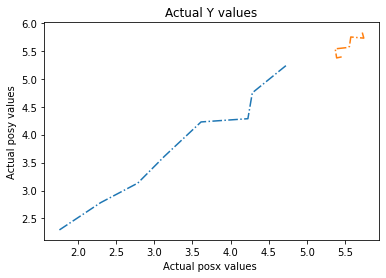

1/1 [==============================] - 0s 39ms/step


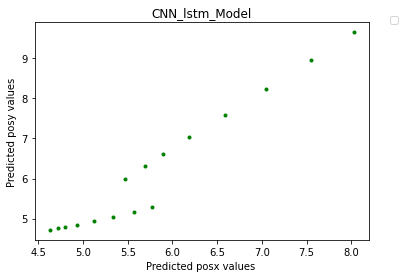

1/1 [==============================] - 0s 63ms/step


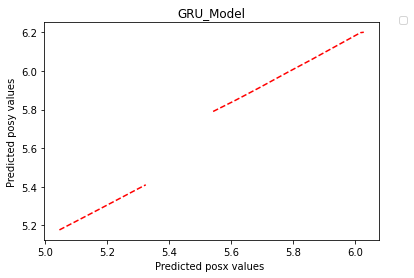

1/1 [==============================] - 0s 53ms/step


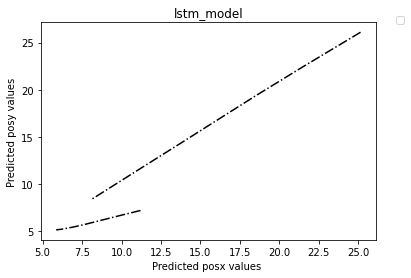

<Figure size 432x288 with 0 Axes>

In [252]:
plot([model1,model2,model3], X, y, 'pad71')

In [253]:
def any_padestrian_plot(padestrian_id):
  try:
    pad_data = new_data[new_data['pedestrian_ID']==float(padestrian_id)]
    stack = MakeInputOutput(pad_data) # taking only X and y value for this moment
    X, y = split_sequences(stack, n_steps_in, n_steps_out)
    # here i am just adding all the features
    for feature in feature_to_add:
        new_X = addNewFeature(X,feature,pad_data)
        X = new_X
    plot([model1,model2,model3], X, y, f'{padestrian_id} plot')
  except:
    return 'may not enough data'

INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added


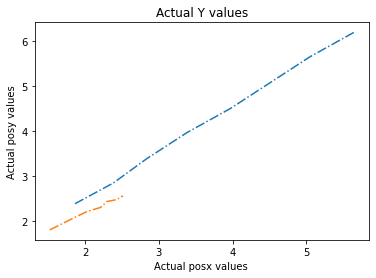

1/1 [==============================] - 0s 21ms/step


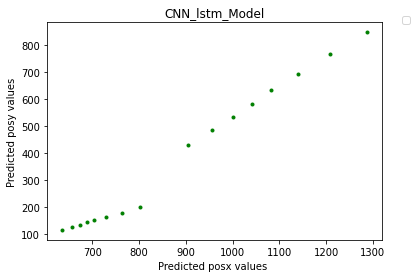

1/1 [==============================] - 0s 22ms/step


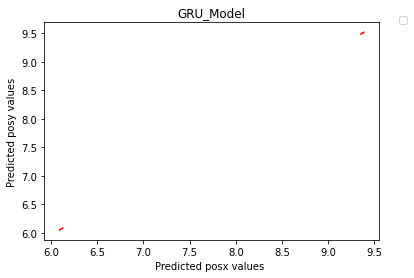

1/1 [==============================] - 0s 29ms/step


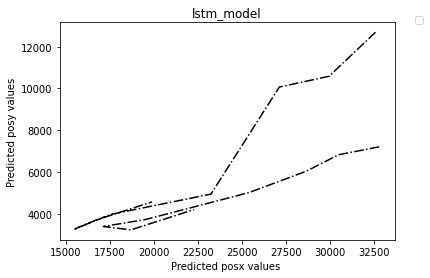

<Figure size 432x288 with 0 Axes>

In [254]:
any_padestrian_plot(111)

INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added
INFO: allnew features has been added


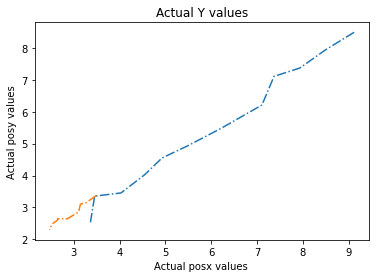

1/1 [==============================] - 0s 59ms/step


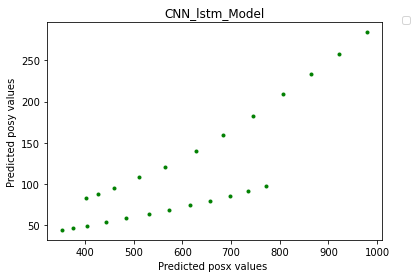

1/1 [==============================] - 0s 22ms/step


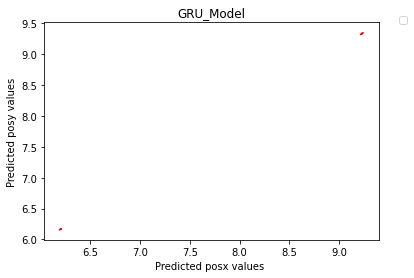

1/1 [==============================] - 0s 41ms/step


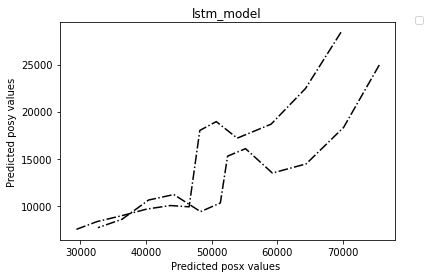

<Figure size 432x288 with 0 Axes>

In [257]:
any_padestrian_plot(200)